In [ ]:
# вариант 28: cosh(1 + 1 / (1 + x)^2) - x + 6 = 0  (0, 10)
# Тихомиров Юнес Б20-215
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def func(x):
  return np.cosh(1 + 1 / (1 + x)**2) - x + 6

def derivative(x):
  return np.sinh(1 + 1 / (1 + x)**2) * (- 2 / (1 + x)**(3)) - 1

In [ ]:
x0 = 7.5592661718993
epsList = [10**(-3), 10**(-6), 10**(-9)]
a = 0
b = 10

In [ ]:
def dichotomy(a, b, eps, func):
  xList = []
  countNumber = 0

  if (abs(func(a)) < eps):
    return a, countNumber, xList

  elif (abs(func(b)) < eps):
    return b, countNumber, xList

  else:
    while ((b - a) > eps):
      xCurrent = (a + b) / 2
      xList.append(xCurrent)
      if (func(xCurrent) * func(b) <= 0):
        a = xCurrent
      else:
        b = xCurrent
      countNumber += 1
    
    return xCurrent, countNumber, xList 

In [ ]:
def newton(a, b, eps, func, derivative):
  xList = []
  countNumber = 0
  # if (abs(func(a)) < eps):
  #   return a, countNumber, xList
  # if (abs(func(b)) < eps):
  #   return b, countNumber, xList
  
  # xCurrent = (a + b) / 2
  # xList.append(xCurrent)
  # countNumber += 1
  x0 = (a + b) / 2
  xList.append(x0)
  countNumber += 1

# abs(func(xCurrent)) > eps
  while (True):
    xCurrent = x0 - (func(x0) / derivative(x0))
    countNumber += 1
    xList.append(xCurrent)
    if ((abs(xCurrent - x0) <= eps) and (abs(func(xCurrent)) <= eps)):
      break
    x0 = xCurrent
  
  return xCurrent, countNumber, xList

In [ ]:
def main():
  print("True root value: ", x0)
  print(" ")
  for i in range(3):
    print("Numeric root value with eps = ", epsList[i], " (dichotomy method): ", dichotomy(a, b, epsList[i], func)[0])
    print("Numeric root value with eps = ", epsList[i], " (Newton's method): ", newton(a, b, epsList[i], func, derivative)[0])
    print(" ")
    print("Number of steps with eps = ", epsList[i], " (dichotomy method): ", dichotomy(a, b, epsList[i], func)[1])
    print("Number of steps with eps = ", epsList[i], " (Newton's method): ", newton(a, b, epsList[i], func, derivative)[1])
    print(" ")
    # print("Convergence speed with eps = ", epsList[i], " (dichotomy method): ", convergenceRate(dichotomy(a, b, epsList[i], func)[2]))
    # print("Convergence speed with eps = ", epsList[i], " (Newton's method): ", convergenceRate(newton(a, b, epsList[i], func, derivative)[2]))
    # print(" ")
  
  countNumberDichotomy = []
  countNumberNewton = []
  epsRange = np.arange(10**(-9), 10**(-3), 10**(-7))
  for k in range(epsRange.size):
    countNumberDichotomy.append(dichotomy(a, b, epsRange[k], func)[1])
    countNumberNewton.append(newton(a, b, epsRange[k], func, derivative)[1])
  
  fig, axs = plt.subplots(2, figsize = (17, 15))
  axs[0].plot(epsRange, countNumberDichotomy, color='r', label='Iteration number (dichotomy method)')
  axs[0].set_title("Iteration number (dichotomy method)")
  axs[1].plot(epsRange, countNumberNewton, color='b', label='Iteration number (Newtons method)')
  axs[1].set_title("Iteration number (Newtons method)")

  for ax in axs:
    ax.set_xlabel("eps")
    ax.set_ylabel("Iterations")
    ax.legend()
    ax.grid(True)
  plt.show()


True root value:  7.5592661718993
 
Numeric root value with eps =  0.001  (dichotomy method):  7.5592041015625
Numeric root value with eps =  0.001  (Newton's method):  7.5592661718993055
 
Number of steps with eps =  0.001  (dichotomy method):  14
Number of steps with eps =  0.001  (Newton's method):  4
 
Numeric root value with eps =  1e-06  (dichotomy method):  7.559266686439514
Numeric root value with eps =  1e-06  (Newton's method):  7.5592661718993055
 
Number of steps with eps =  1e-06  (dichotomy method):  24
Number of steps with eps =  1e-06  (Newton's method):  4
 
Numeric root value with eps =  1e-09  (dichotomy method):  7.559266172465868
Numeric root value with eps =  1e-09  (Newton's method):  7.5592661718993055
 
Number of steps with eps =  1e-09  (dichotomy method):  34
Number of steps with eps =  1e-09  (Newton's method):  5
 


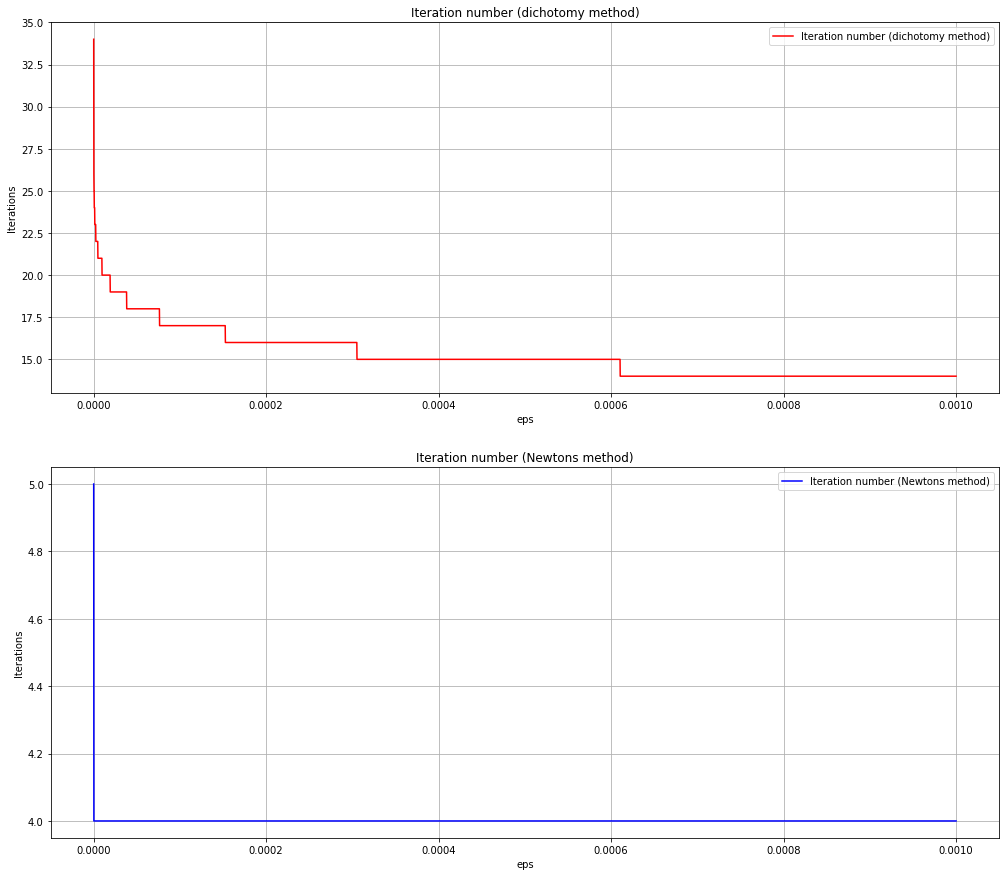

In [ ]:
main()

In [ ]:
def convergenceRate(xList): 
  rates = []
  if len(xList) > 3:
    for k in range(3, len(xList)):
      rates.append(np.log((xList[k] - xList[k - 1]) / (xList[k - 1] - xList[k - 2])) / np.log((xList[k - 1] - xList[k - 2]) / (xList[k - 2] - xList[k - 3])))
  else:
    return None
  return rates[-1]